In [118]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [119]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [120]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [121]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m)))
    w_ = ss @ X.T @ Y * (1 / var)
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [122]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.00767011735296619


In [123]:
def display(m, alpha, beta, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha},bate={beta}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


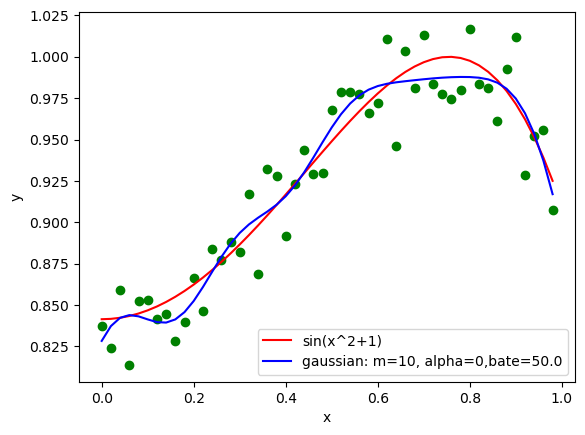

w:  [ 0.58774377  0.64725666 -1.14795795  1.78249866 -1.76997492  1.83285936
 -1.30371308  1.20691853 -0.66938959  0.57140923]


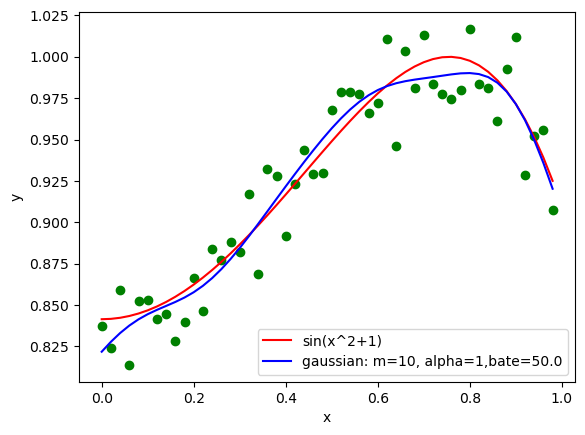

w:  [ 0.75537737  0.10407394 -0.06679279  0.08663595  0.042501    0.02597883
  0.12011223  0.04717934  0.01449735  0.1742471 ]


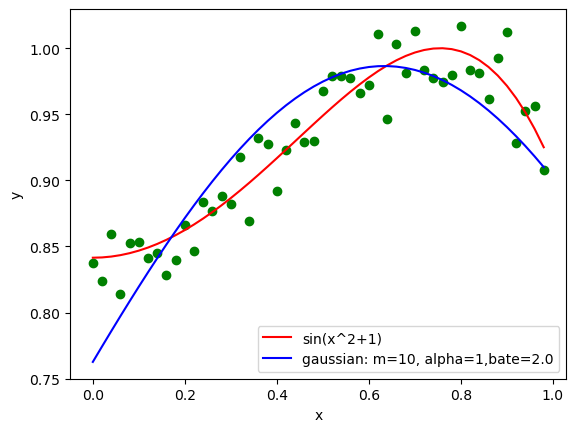

w:  [0.23766549 0.0420441  0.04247396 0.04803455 0.05907198 0.07530363
 0.0958146  0.11914337 0.14344539 0.16671018]


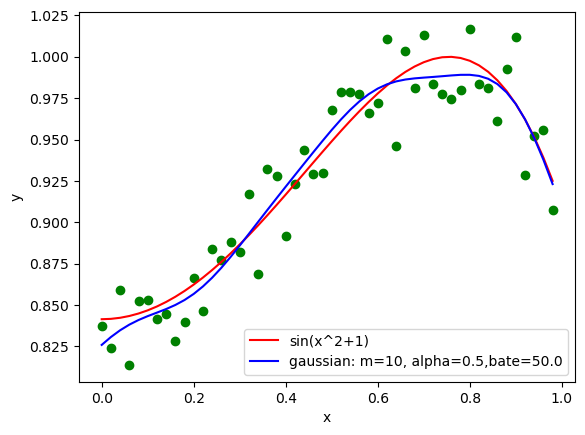

w:  [ 0.76693874  0.10361668 -0.09328697  0.115551    0.02253965  0.01498224
  0.13622695  0.02881174  0.0199332   0.16371686]


In [124]:
params = [(0.02, 0), (0.02, 1), (0.5, 1), (0.02, 0.5)]

for var_el, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



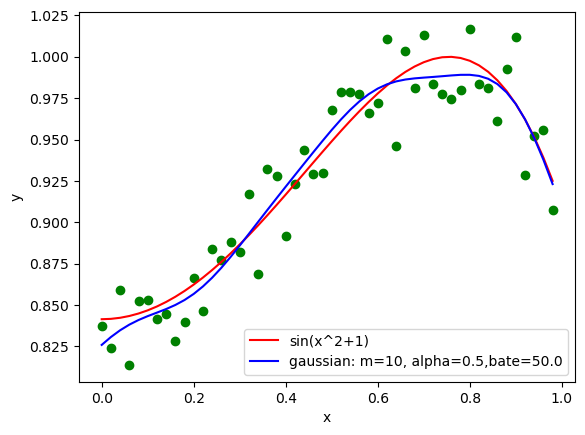

w:  [ 0.76693874  0.10361668 -0.09328697  0.115551    0.02253965  0.01498224
  0.13622695  0.02881174  0.0199332   0.16371686]


In [125]:
param = [(0.02, 0.5)]
for var_el, al in param:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)

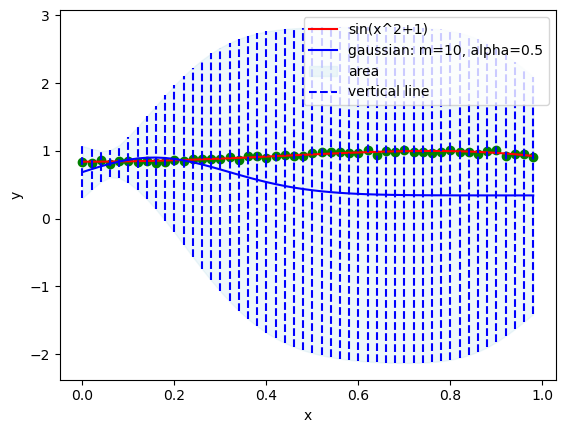

[3]
1


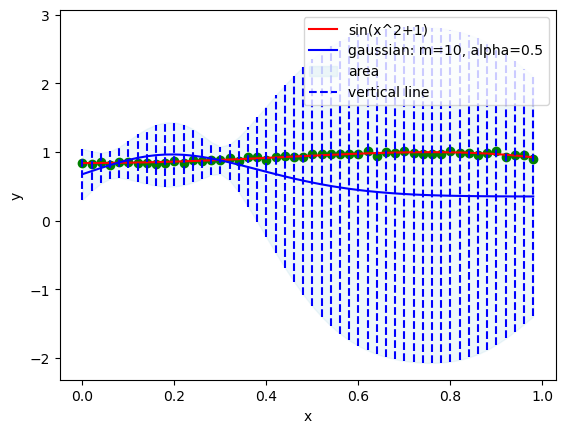

[3, 15]
2


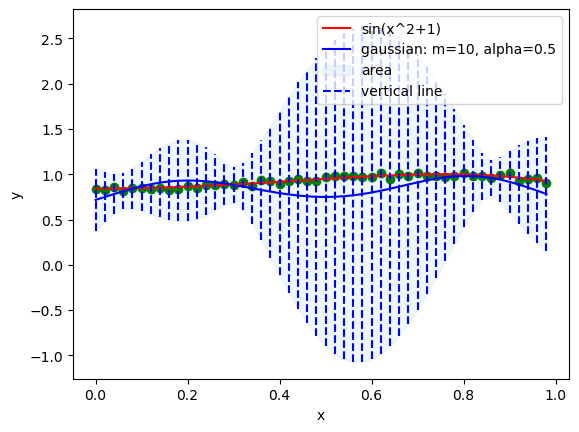

[3, 15, 43]
3


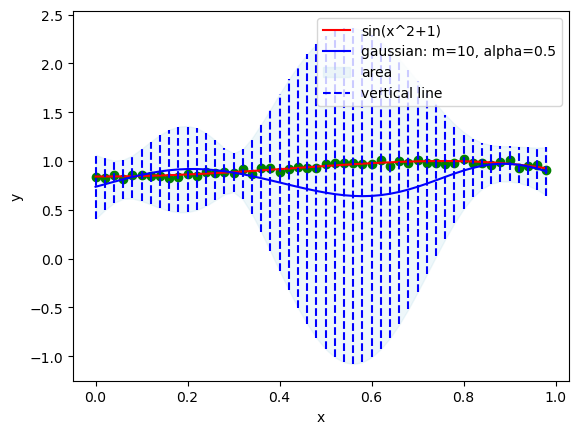

[3, 15, 43, 47]
4


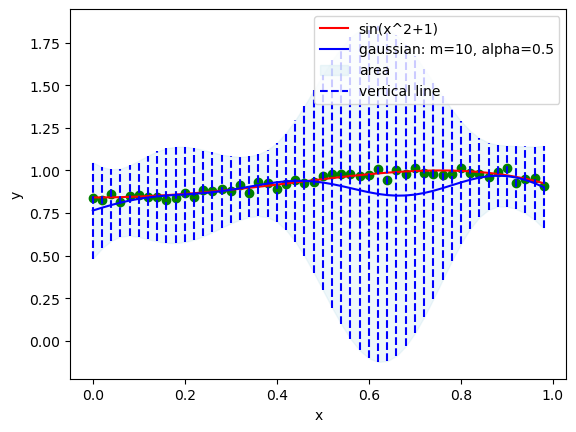

[3, 15, 43, 47, 19]
5


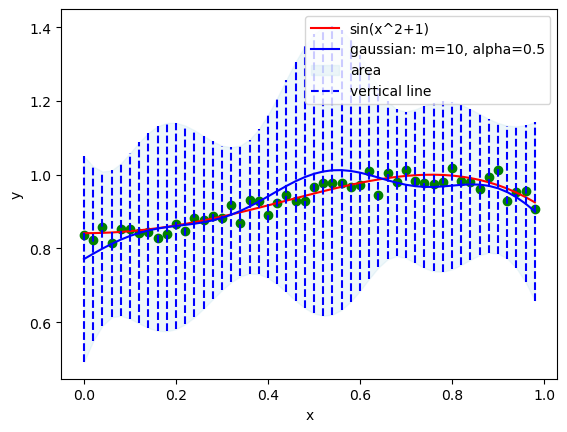

[3, 15, 43, 47, 19, 34]
6


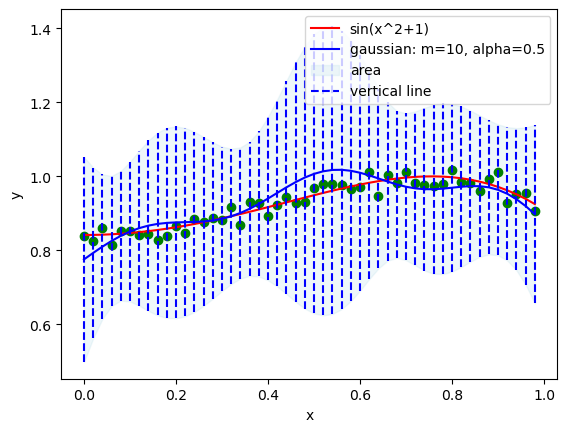

[3, 15, 43, 47, 19, 34, 4]
7


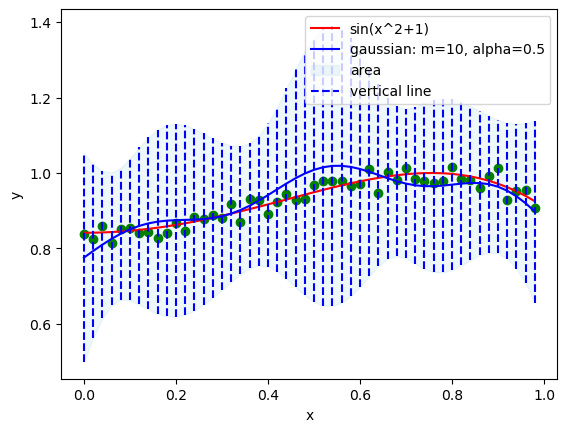

[3, 15, 43, 47, 19, 34, 4, 19]
8


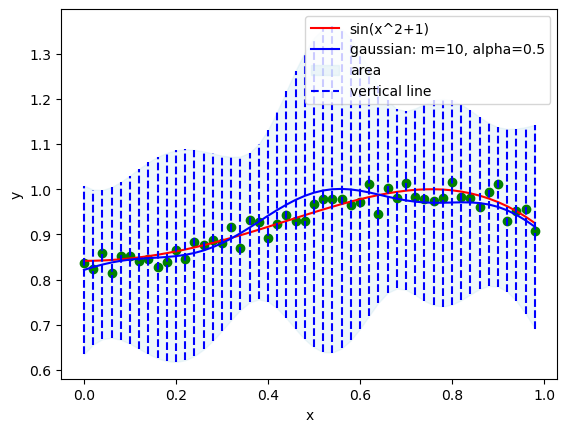

[3, 15, 43, 47, 19, 34, 4, 19, 0]
9


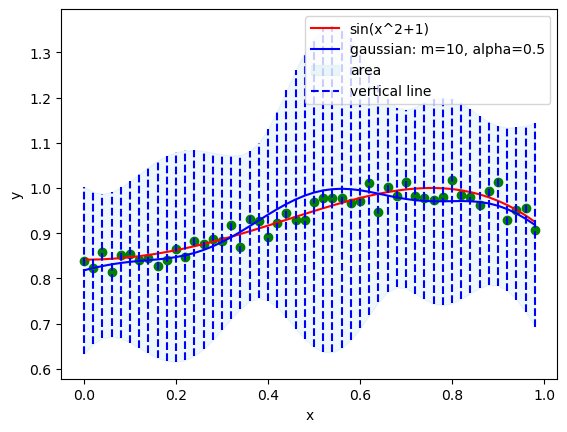

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3]
10


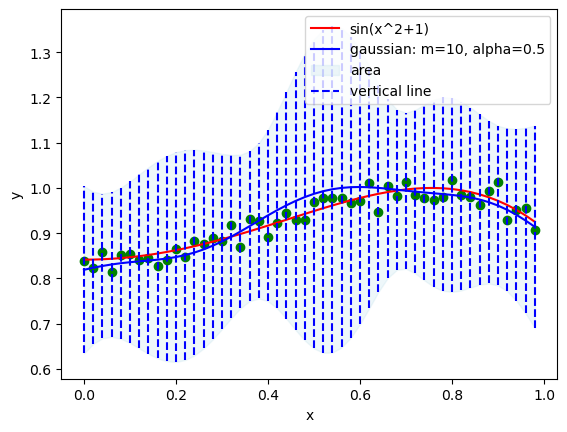

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35]
11


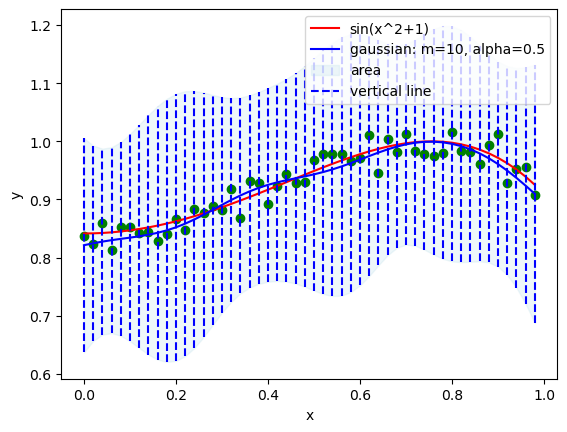

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24]
12


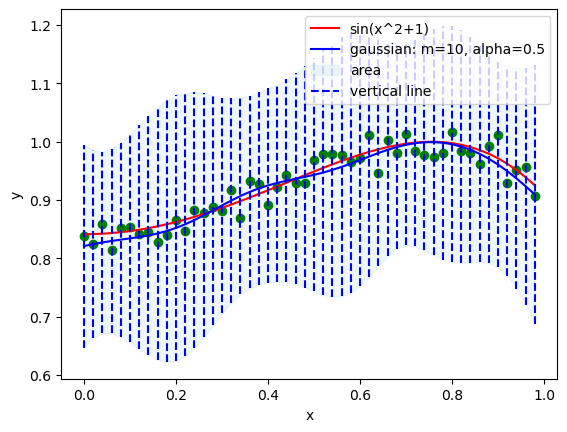

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1]
13


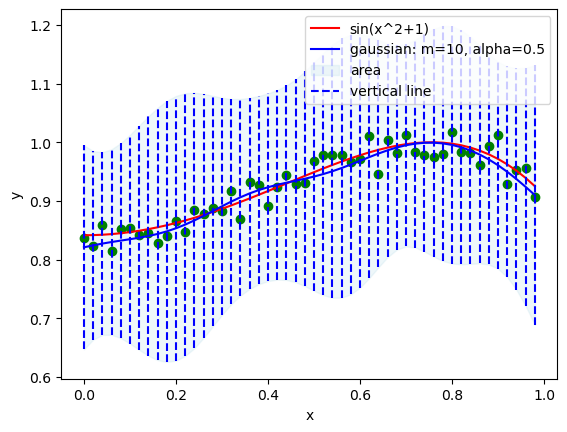

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21]
14


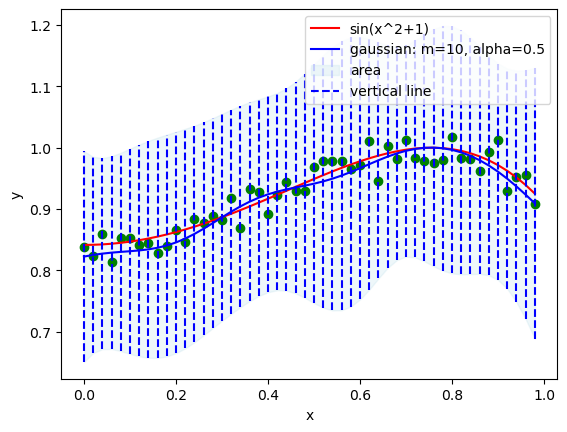

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11]
15


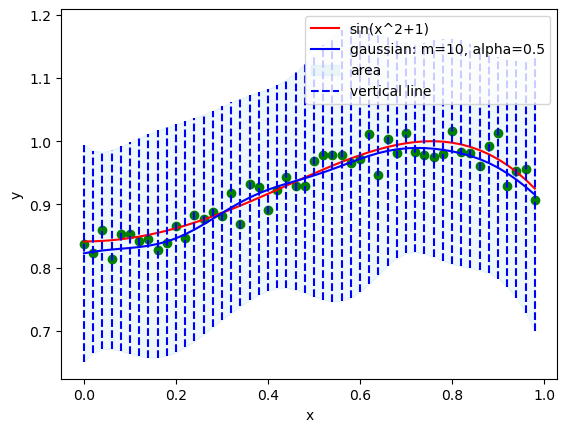

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38]
16


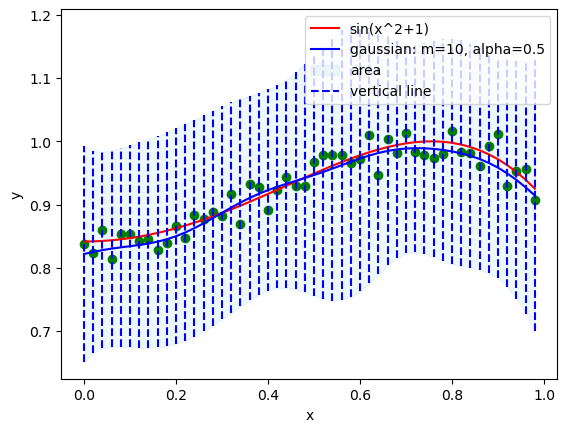

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7]
17


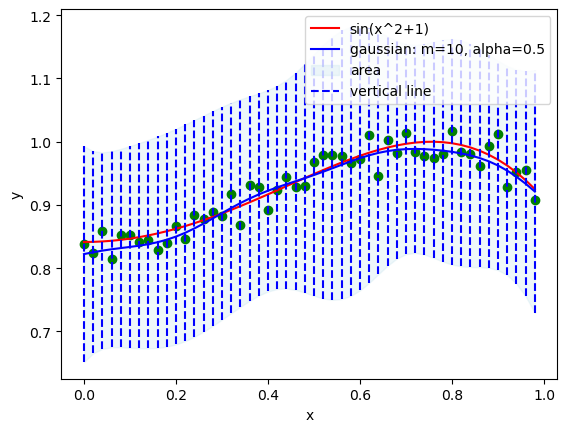

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47]
18


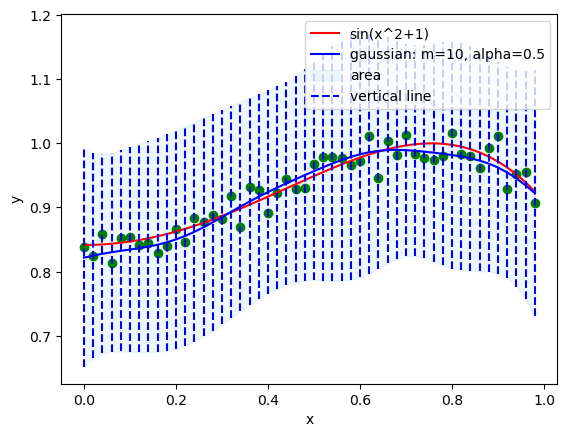

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25]
19


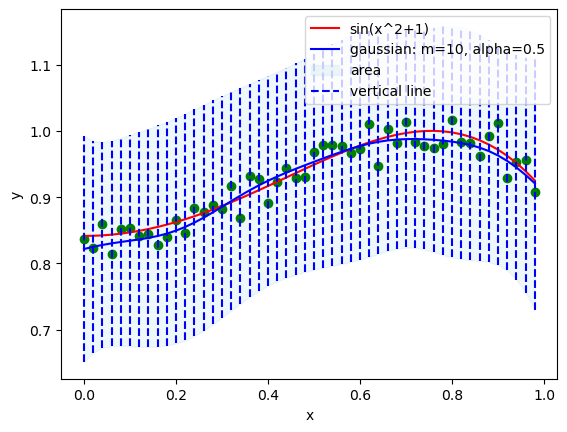

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29]
20


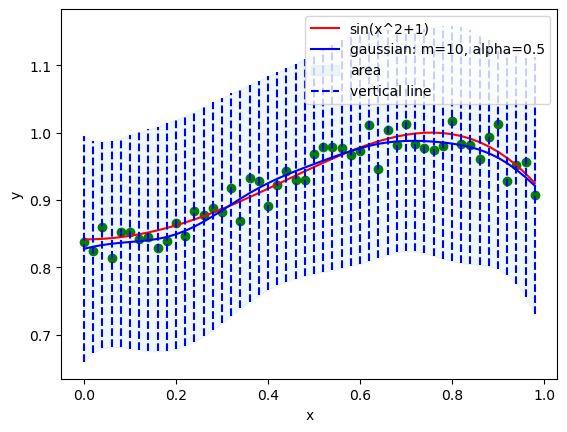

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2]
21


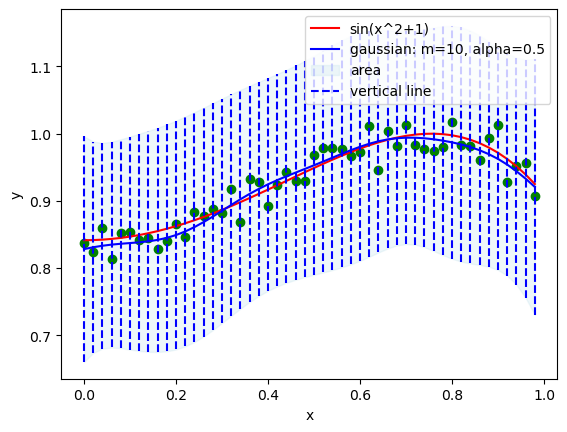

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35]
22


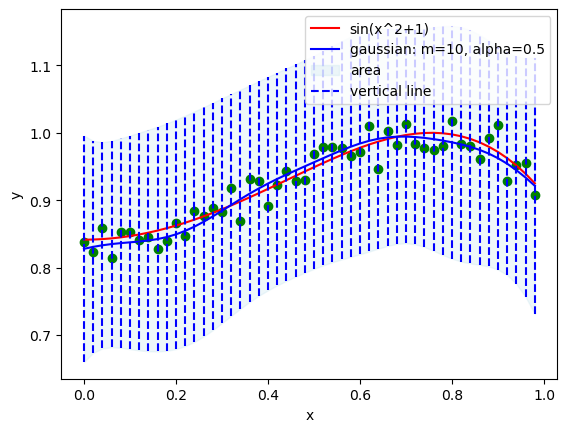

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27]
23


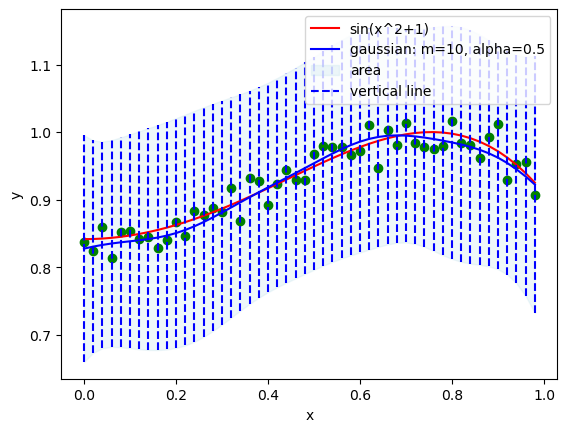

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20]
24


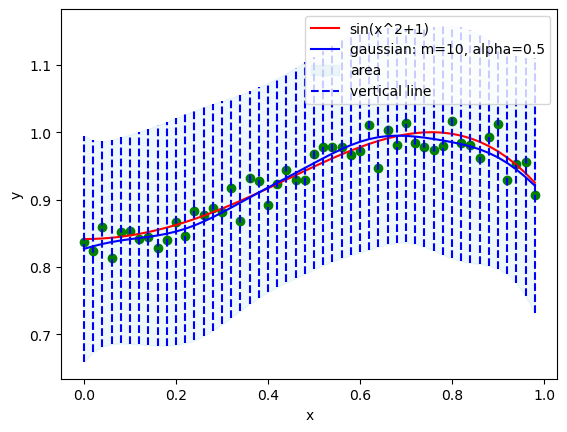

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5]
25


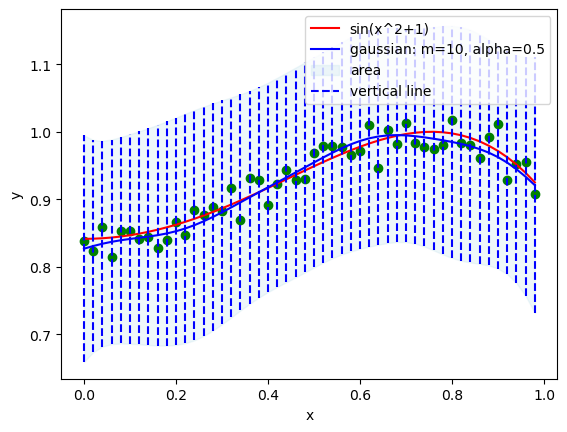

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28]
26


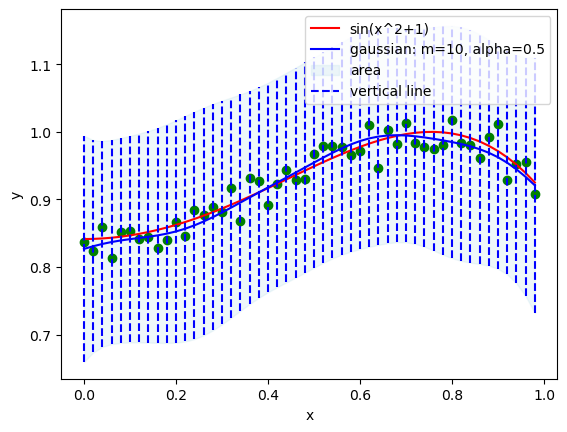

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7]
27


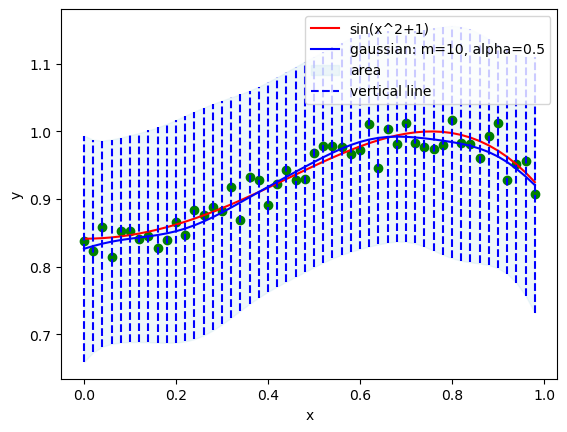

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34]
28


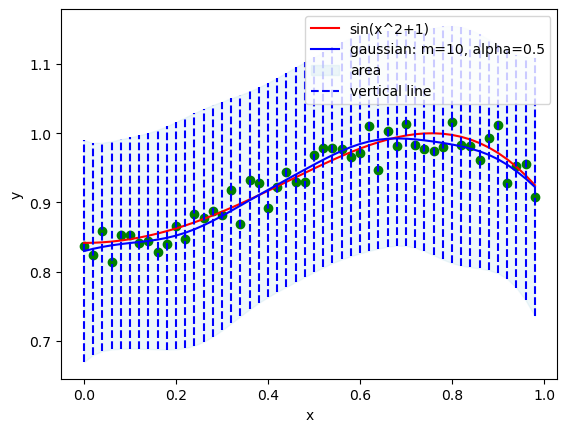

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0]
29


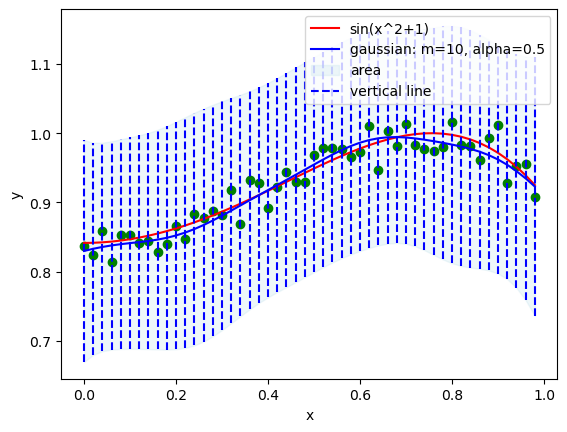

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33]
30


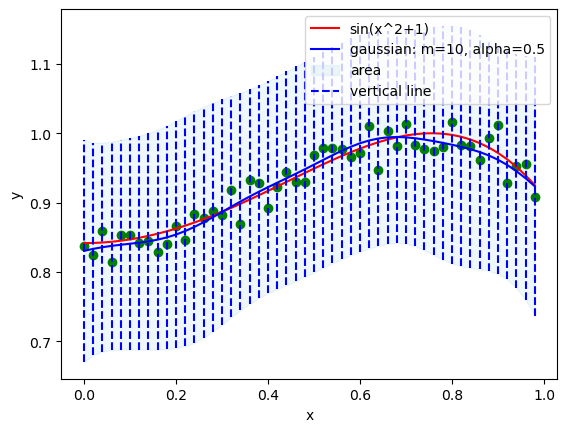

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18]
31


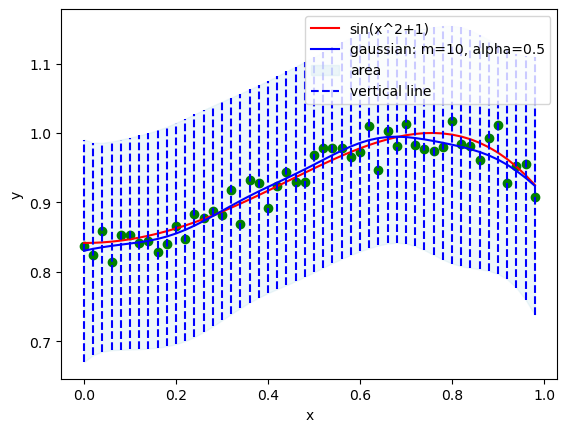

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13]
32


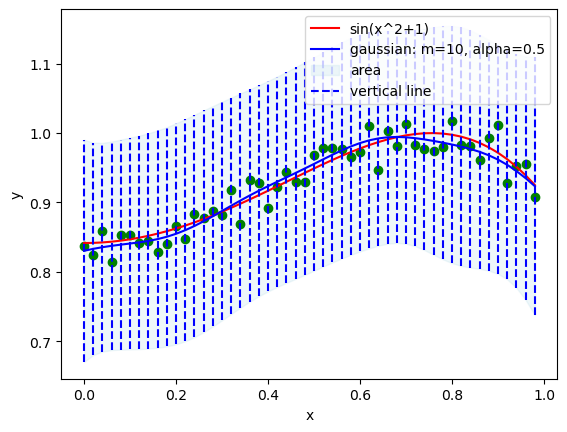

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22]
33


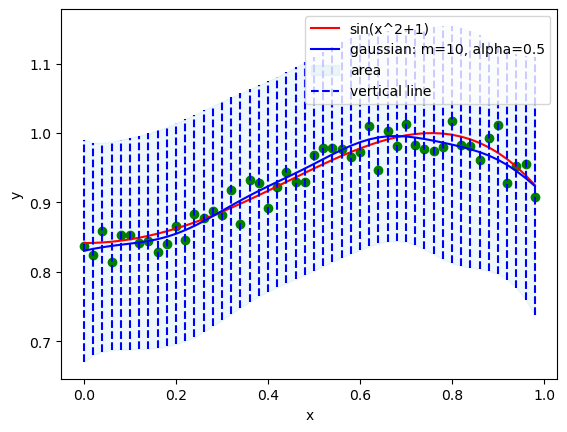

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33]
34


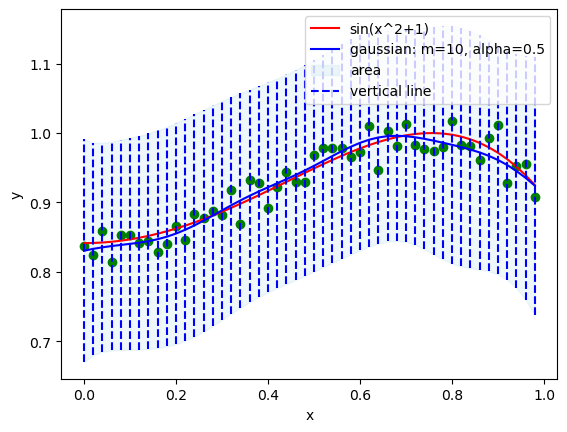

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24]
35


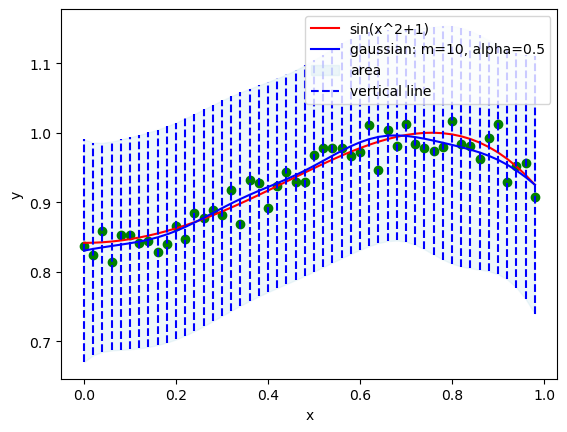

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12]
36


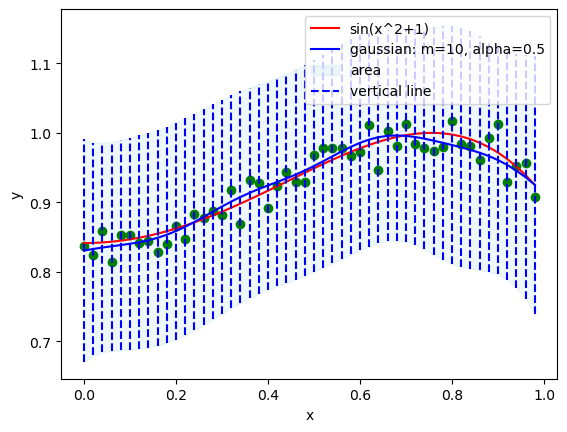

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18]
37


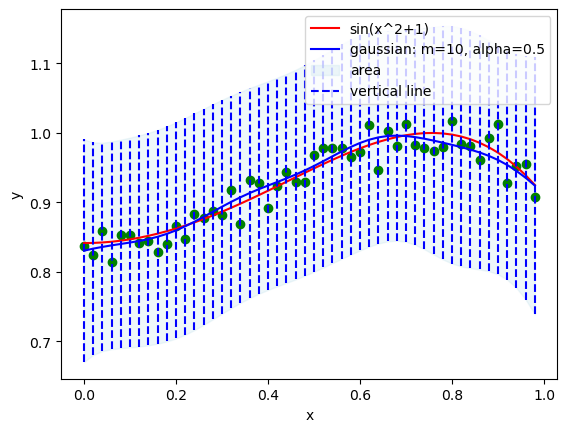

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5]
38


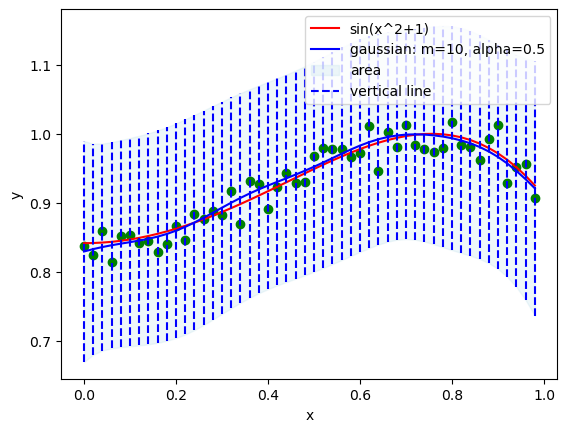

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5, 40]
39


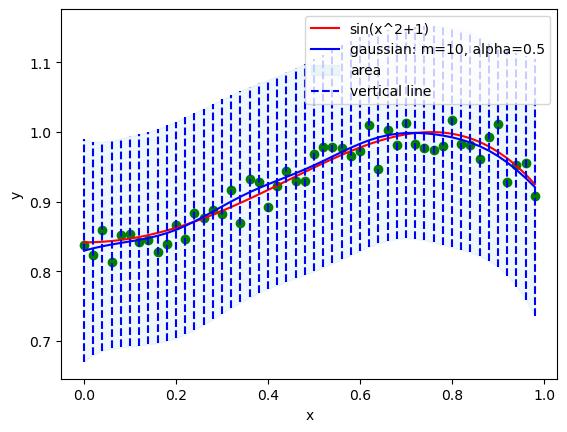

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5, 40, 42]
40


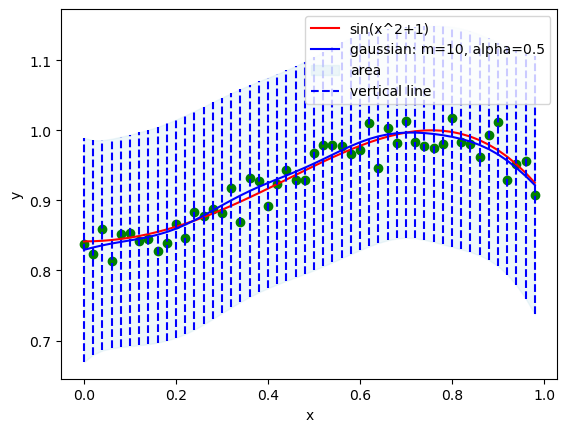

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5, 40, 42, 36]
41


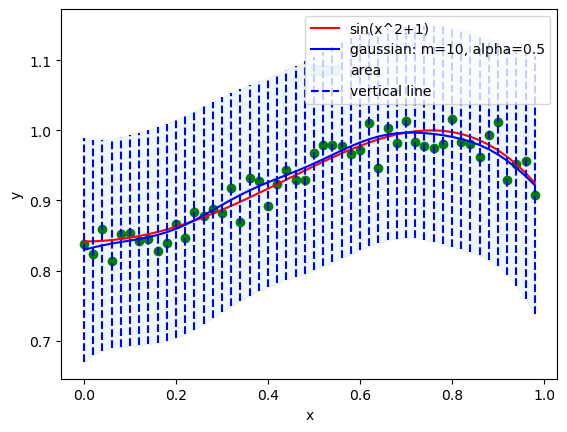

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5, 40, 42, 36, 19]
42


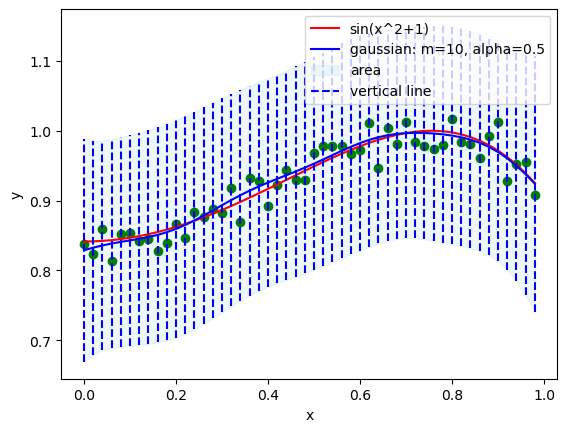

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5, 40, 42, 36, 19, 44]
43


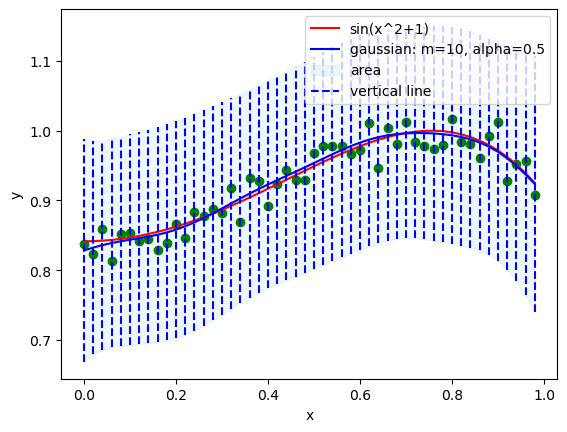

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5, 40, 42, 36, 19, 44, 17]
44


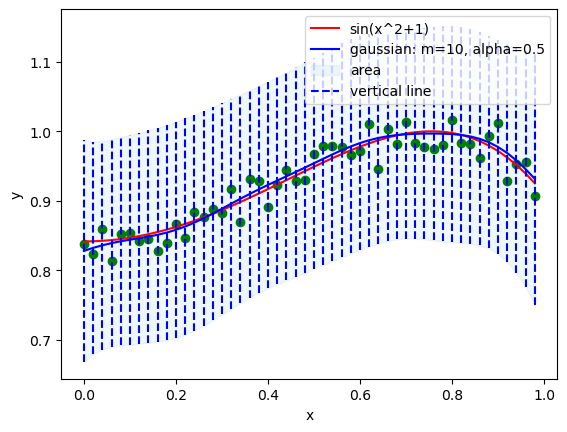

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5, 40, 42, 36, 19, 44, 17, 45]
45


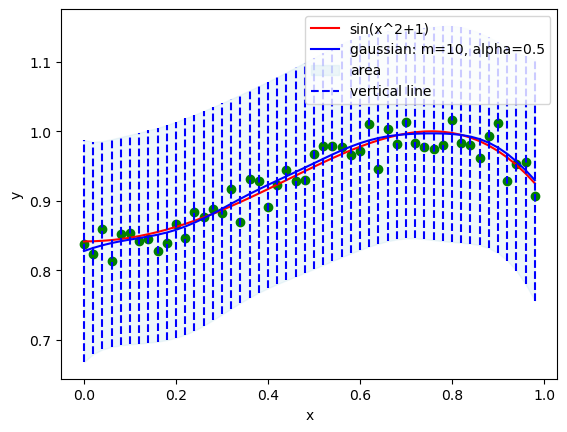

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5, 40, 42, 36, 19, 44, 17, 45, 47]
46


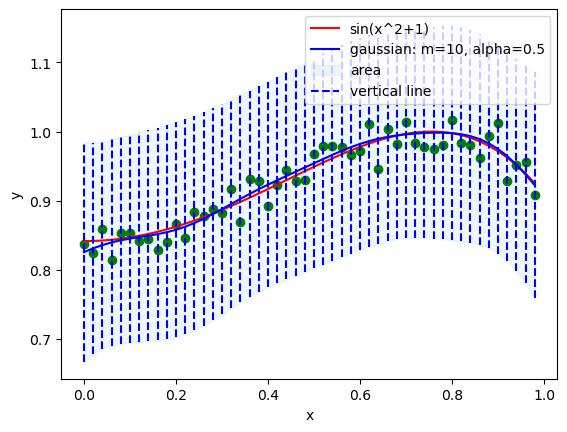

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5, 40, 42, 36, 19, 44, 17, 45, 47, 49]
47


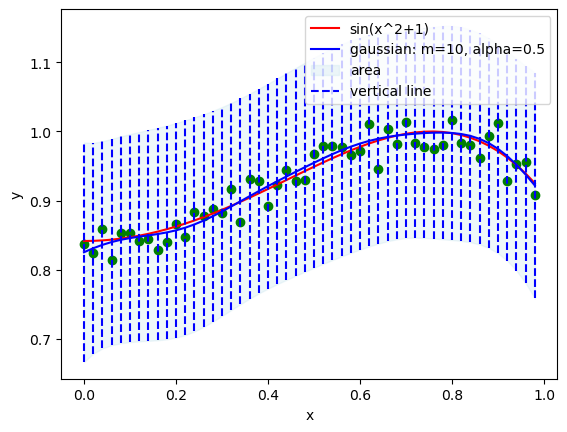

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5, 40, 42, 36, 19, 44, 17, 45, 47, 49, 17]
48


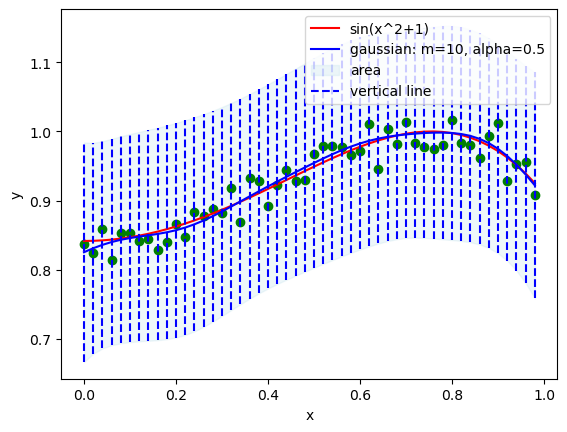

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5, 40, 42, 36, 19, 44, 17, 45, 47, 49, 17, 21]
49


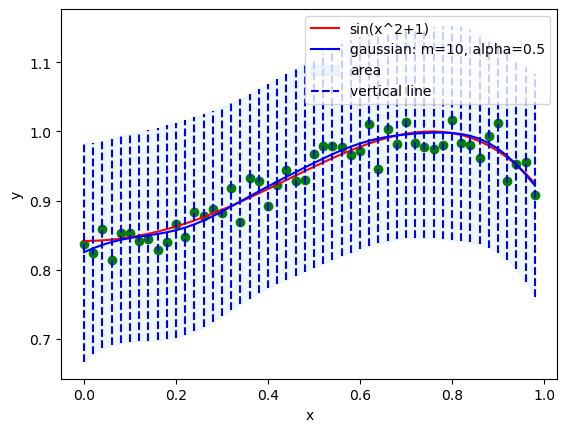

[3, 15, 43, 47, 19, 34, 4, 19, 0, 3, 35, 24, 1, 21, 11, 38, 7, 47, 25, 29, 2, 35, 27, 20, 5, 28, 7, 34, 0, 33, 18, 13, 22, 33, 24, 12, 18, 5, 40, 42, 36, 19, 44, 17, 45, 47, 49, 17, 21, 47]
50


In [126]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


i_arr = []

# x, y_origin, y_noise, sub_y = get_data(nodes, mu, var, 1.0, p_1)
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)

for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # x_arr.append(x[index])
    # y_noise_arr.append(y_noise[index])
    w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var, gaussian, 1.0)
    y_ = X @ w_
    var_x = []
    for el in X:
        var_x.append(var + el.T @ ss @ el)

    display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)
